In [3]:
import pickle

path = './DATASET_Synapse/unetr_pp_raw/unetr_pp_raw_data/Task02_Synapse/Task002_Synapse/splits_final.pkl'
with open(path,"rb") as fr:
    data = pickle.load(fr)

print(data[0]) # fold 0
# we will 수정가능

OrderedDict([('train', array(['img0001', 'img0002', 'img0003', 'img0005', 'img0006', 'img0007',
       'img0008', 'img0010', 'img0021', 'img0022', 'img0024', 'img0025',
       'img0027', 'img0028', 'img0030', 'img0031', 'img0032', 'img0033',
       'img0034', 'img0035', 'img0036', 'img0038', 'img0039', 'img0040'],
      dtype='<U7')), ('val', array(['img0004', 'img0009', 'img0023', 'img0026', 'img0029', 'img0037'],
      dtype='<U7'))])


In [6]:
# 일단, train: 4개, valid: 1개로 설정해보기
data = [data[0]]

In [11]:
import numpy as np

In [12]:
print(data)
data[0]['train'] = np.array(['img0001', 'img0002', 'img0003', 'img0005'], dtype='<U7')
data[0]['val'] = np.array(['img0004'], dtype='<U7')

[OrderedDict([('train', array(['img0001', 'img0002', 'img0003', 'img0005', 'img0006', 'img0007',
       'img0008', 'img0010', 'img0021', 'img0022', 'img0024', 'img0025',
       'img0027', 'img0028', 'img0030', 'img0031', 'img0032', 'img0033',
       'img0034', 'img0035', 'img0036', 'img0038', 'img0039', 'img0040'],
      dtype='<U7')), ('val', array(['img0004', 'img0009', 'img0023', 'img0026', 'img0029', 'img0037'],
      dtype='<U7'))])]


In [15]:
### 피클 파일로 저장할 때 ###
path = './DATASET_Synapse/unetr_pp_raw/unetr_pp_raw_data/Task02_Synapse/Task002_Synapse/splits_final_sub.pkl'
with open(path,"wb") as fw:
    pickle.dump(data, fw)

In [4]:
# unetr_pp.training.dataloading.dataset_loading import load_dataset => data 불러오는거 cheking
def load_dataset(folder, num_cases_properties_loading_threshold=1000):
    # we don't load the actual data but instead return the filename to the np file.
    print('loading dataset')
    case_identifiers = get_case_identifiers(folder)
    case_identifiers.sort()
    dataset = OrderedDict()
    
    for c in case_identifiers:
        dataset[c] = OrderedDict()
        dataset[c]['data_file'] = join(folder, "%s.npz" % c)

        # dataset[c]['properties'] = load_pickle(join(folder, "%s.pkl" % c))
        dataset[c]['properties_file'] = join(folder, "%s.pkl" % c)

        if dataset[c].get('seg_from_prev_stage_file') is not None:
            dataset[c]['seg_from_prev_stage_file'] = join(folder, "%s_segs.npz" % c)

    if len(case_identifiers) <= num_cases_properties_loading_threshold:
        print('loading all case properties')
        for i in dataset.keys():
            dataset[i]['properties'] = load_pickle(dataset[i]['properties_file'])

    return dataset

In [153]:
# mha file loader
from medpy.io import load
mha_file = './DATASET_Synapse/unetr_pp_raw/unetr_pp_raw_data/Task02_Synapse/Task002_Synapse/unetr_pp_Data_plans_v2.1_stage1'
mage_data, image_header = load(mha_file+'/img0001.mha')

In [154]:
mage_data.shape # color_channels?

(512, 512, 153)

In [155]:
import matplotlib.pyplot as plt
plt.imshow(mage_data[100])

In [156]:
x,y,z = mage_data.shape 
mage_data = mage_data.transpose(2,0,1)

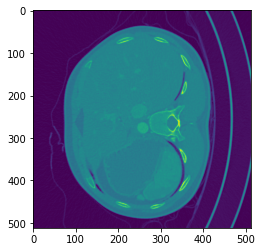

In [157]:
import matplotlib.pyplot as plt
plt.imshow(mage_data[100])

In [158]:
mage_data = np.rot90(mage_data, 1, axes = (1, 2))

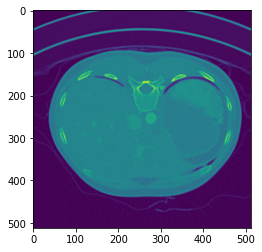

In [159]:
import matplotlib.pyplot as plt
plt.imshow(mage_data[100])

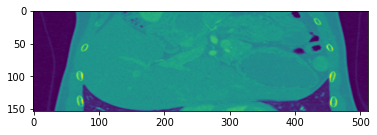

In [167]:
plt.imshow(mage_data[:,300,:])

In [190]:
our_file = './DATASET_Synapse/unetr_pp_raw/unetr_pp_raw_data/Task02_Synapse/Task002_Synapse/unetr_pp_Data_plans_v2.1_stage1'
npy_data = np.load(our_file+'./img0005.npy')

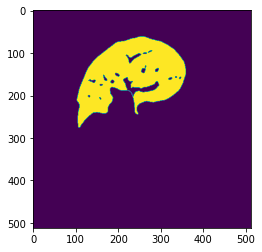

In [191]:
plt.imshow(npy_data[1][100])

In [192]:
print(np.unique(npy_data[1]))

[0 1]


In [ ]:
# whole_liver 전처리1
# 0. GT: make labeling (255 -> 1)
# 1. mha_data -> shape changing // (512, 512, 153) -> (153, 512, 512)
# 2. Apply preprocessing like UNETR++
# 3. Save folder

In [46]:
255 in np.unique(mage_data)

True

In [55]:
index = np.where(mage_data==255)
mage_data[index] = 1 # changing

In [56]:
np.unique(mage_data)

array([0, 1], dtype=uint8)

In [245]:
# npz file load
npz_file = './DATASET_Synapse/unetr_pp_raw/unetr_pp_raw_data/Task02_Synapse/Task002_Synapse/unetr_pp_Data_plans_v2.1_stage1_OR'
npz_data = np.load(npz_file+'./img0001.npy')

In [246]:
npz_data.shape # (2, 147, 451, 451) ?

(2, 147, 451, 451)

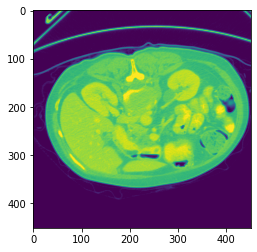

In [247]:
import matplotlib.pyplot as plt
plt.imshow(npz_data[0][100])

In [248]:
plt.imshow(npz_data[0][:,150,:])

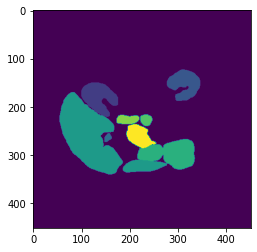

In [249]:
import matplotlib.pyplot as plt
plt.imshow(npz_data[1][100]) # ?? -> 예측 결과?

In [250]:
np.unique(npz_data[1])

array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
       12., 13.], dtype=float32)

In [255]:
plt.imshow(npz_data[1][0])

In [254]:
index = np.where(npz_data[1]==-1) # -1 is bug??
print(index)

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   1,   3,   4,   4,   4,
         5,   7,   7,   8,   8,  10,  12,  12,  13,  13,  15,  

In [224]:
for i in range(npz_data[1].shape[0]):
    index = np.where(npz_data[1][i]==-1.)
    if len(index[0]) > 0:
        print(i)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [35]:
import pickle

path = './DATASET_Synapse/unetr_pp_raw/unetr_pp_raw_data/Task02_Synapse/Task002_Synapse/unetr_pp_Plansv2.1_plans_3D.pkl'
with open(path,"rb") as fr:
    data = pickle.load(fr)

print(data)
# we will 수정가능

{'num_stages': 2, 'num_modalities': 1, 'modalities': {0: 'CT'}, 'normalization_schemes': OrderedDict([(0, 'CT')]), 'dataset_properties': {'all_sizes': [(147, 512, 512), (139, 512, 512), (198, 512, 512), (140, 512, 512), (117, 512, 512), (131, 512, 512), (163, 512, 512), (148, 512, 512), (149, 512, 512), (148, 512, 512), (143, 512, 512), (89, 512, 512), (96, 512, 512), (124, 512, 512), (85, 512, 512), (131, 512, 512), (88, 512, 512), (89, 512, 512), (100, 512, 512), (153, 512, 512), (93, 512, 512), (144, 512, 512), (104, 512, 512), (98, 512, 512), (94, 512, 512), (184, 512, 512), (99, 512, 512), (100, 512, 512), (90, 512, 512), (195, 512, 512)], 'all_spacings': [array([3.        , 0.66796875, 0.66796875]), array([3.        , 0.72070312, 0.72070312]), array([3.       , 0.8984375, 0.8984375]), array([3.     , 0.59375, 0.59375]), array([3.     , 0.90625, 0.90625]), array([3.        , 0.70117188, 0.70117188]), array([3.        , 0.74804688, 0.74804688]), array([3.        , 0.72851562, 0.728

In [36]:
data['plans_per_stage'][1]

{'batch_size': 2,
 'num_pool_per_axis': [3, 5, 5],
 'patch_size': array([ 64, 128, 128]),
 'median_patient_size_in_voxels': array([148, 512, 512], dtype=int64),
 'current_spacing': array([3.        , 0.75781244, 0.75781244]),
 'original_spacing': array([3.        , 0.75781244, 0.75781244]),
 'do_dummy_2D_data_aug': True,
 'pool_op_kernel_sizes': [[2, 2, 2], [2, 2, 2], [2, 2, 2]],
 'conv_kernel_sizes': [[1, 3, 3],
  [3, 3, 3],
  [3, 3, 3],
  [3, 3, 3],
  [3, 3, 3],
  [3, 3, 3]]}

In [37]:
data['plans_per_stage'][1]['do_dummy_2D_data_aug'] = False # 일단 False

In [38]:
### 피클 파일로 저장할 때 ###unetr_pp_Plansv2.1_plans_3D_sub.pkl
path = './DATASET_Synapse/unetr_pp_raw/unetr_pp_raw_data/Task02_Synapse/Task002_Synapse/'
with open(path,"wb") as fw:
    pickle.dump(data, fw)